##  Introduction

In this project, we analyze customer behavior using a sample dataset. Our goal is to understand patterns in customer spending, churn, and how different factors like gender, region, and campaigns affect purchase behavior.

We will use basic statistics and visualizations to explore:
- Average spending
- Outliers
- Gender differences
- Regional trends
- Campaign performance
- Normality and confidence intervals

This helps us find useful business insights using simple statistical tools.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv("/Users/adiyaanoof/Downloads/customer_behavior.csv")  
df.head()

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07,Fashion,No,A
1,1002,Female,South,NaN,Electronics,Yes,B
2,1003,Female,West,1194.41,Fashion,No,A
3,1004,Female,South,413.06,Grocery,No,A
4,1005,Male,West,1556.32,Fashion,Yes,A


In [8]:
print("Mean:", df['PurchaseAmount'].mean())
print("Median:", df['PurchaseAmount'].median())
print("Mode:", df['PurchaseAmount'].mode()[0])


Mean: 1003.9506701030928
Median: 998.0799999999999
Mode: 0.0


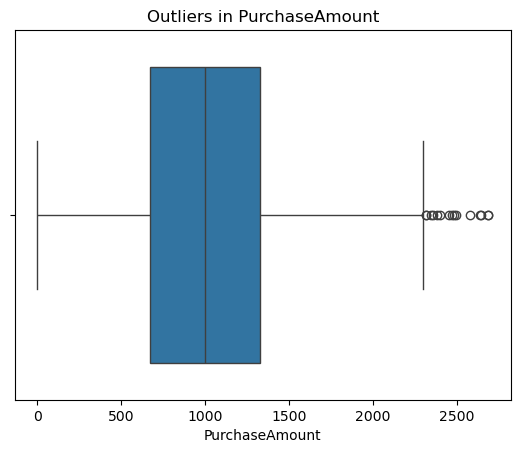

Number of outliers: 15


In [10]:
sns.boxplot(x=df['PurchaseAmount'])
plt.title("Outliers in PurchaseAmount")
plt.show()

Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['PurchaseAmount'] < Q1 - 1.5 * IQR) | (df['PurchaseAmount'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", len(outliers))

In [12]:
print("Skewness:", df['PurchaseAmount'].skew())
print("Kurtosis:", df['PurchaseAmount'].kurt())


Skewness: 0.10609189374631554
Kurtosis: -0.2615105545319705


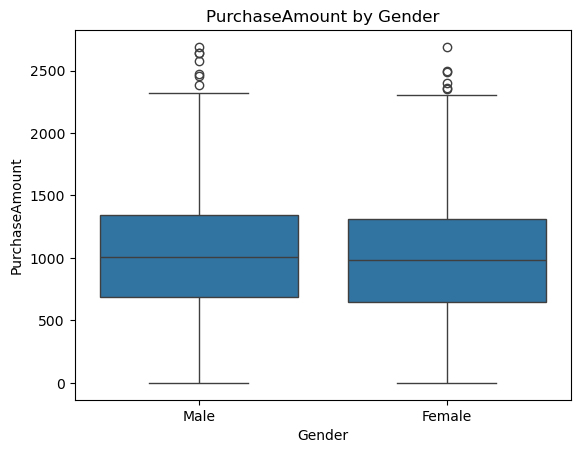

T-test P-value: nan


In [14]:
sns.boxplot(x='Gender', y='PurchaseAmount', data=df)
plt.title("PurchaseAmount by Gender")
plt.show()

male = df[df['Gender'] == 'Male']['PurchaseAmount']
female = df[df['Gender'] == 'Female']['PurchaseAmount']
t_stat, p_val = stats.ttest_ind(male, female)
print("T-test P-value:", p_val)


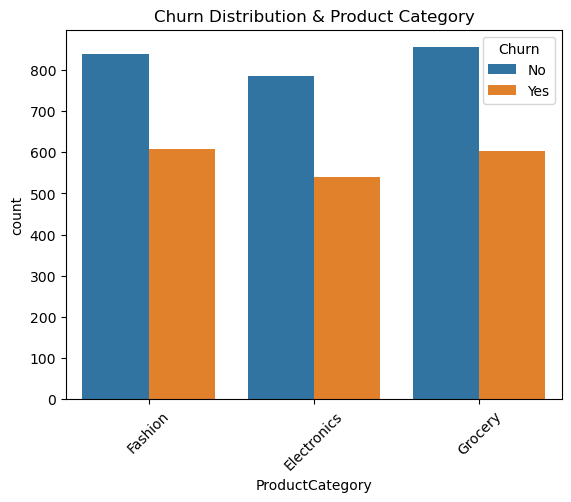

In [16]:
sns.countplot(x='ProductCategory', hue='Churn', data=df)
plt.title("Churn Distribution & Product Category")
plt.xticks(rotation=45)
plt.show()


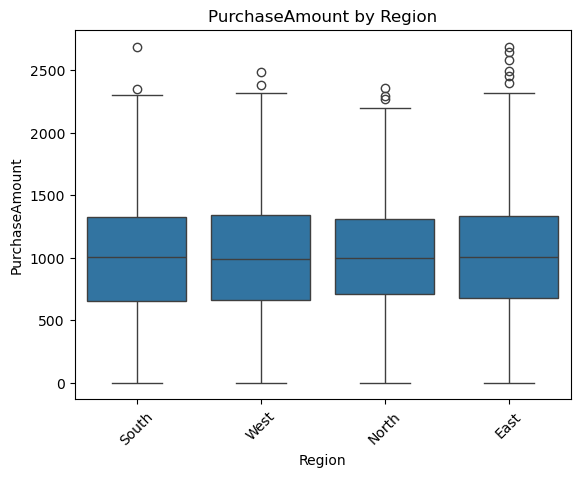

ANOVA P-value: nan


In [18]:
sns.boxplot(x='Region', y='PurchaseAmount', data=df)
plt.title("PurchaseAmount by Region")
plt.xticks(rotation=45)
plt.show()

anova = stats.f_oneway(*(df[df['Region'] == r]['PurchaseAmount'] for r in df['Region'].unique()))
print("ANOVA P-value:", anova.pvalue)


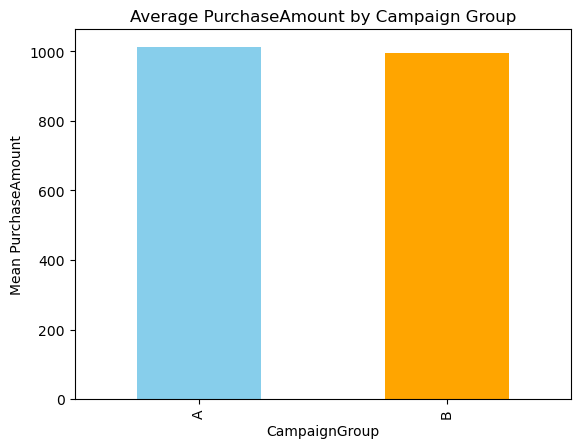

In [20]:
df.groupby('CampaignGroup')['PurchaseAmount'].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average PurchaseAmount by Campaign Group")
plt.ylabel("Mean PurchaseAmount")
plt.show()


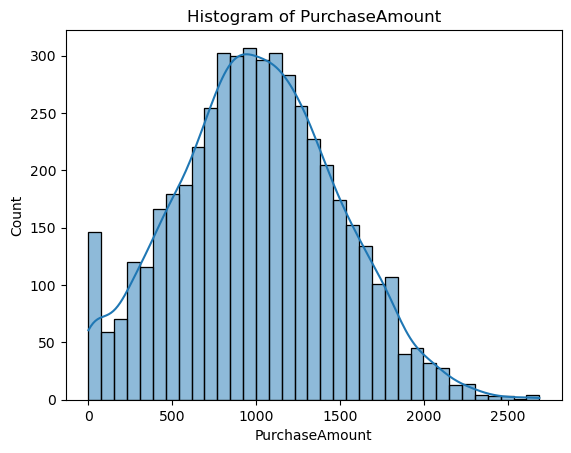

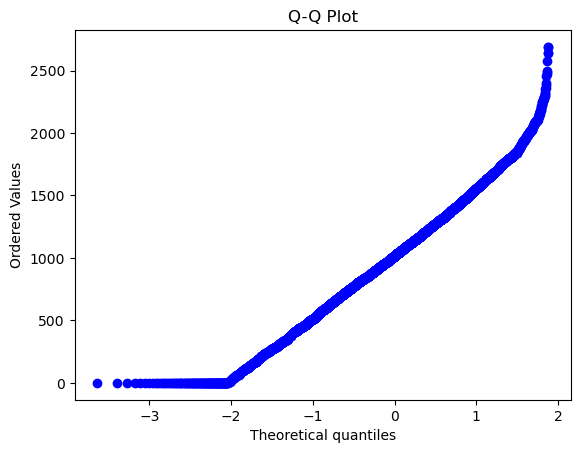

In [22]:
sns.histplot(df['PurchaseAmount'], kde=True)
plt.title("Histogram of PurchaseAmount")
plt.show()

stats.probplot(df['PurchaseAmount'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


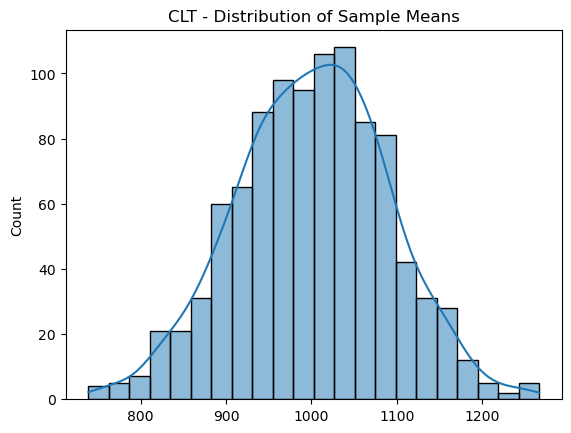

In [24]:
sample_means = [df['PurchaseAmount'].sample(30).mean() for _ in range(1000)]
sns.histplot(sample_means, kde=True)
plt.title("CLT - Distribution of Sample Means")
plt.show()


In [26]:
mean = df['PurchaseAmount'].mean()
std = df['PurchaseAmount'].std()
n = len(df)

margin = 1.96 * (std / np.sqrt(n))
lower_bound = mean - margin
upper_bound = mean + margin

print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval: (990.59, 1017.31)


## Conclusion

Insights:

- The average and typical range of customer spending.
- Outliers and skewness in the purchase data.
- Differences in spending between male and female customers.
- How regions and product categories relate to customer churn.
- Which campaign group performed better in terms of average spending.
- Whether the data follows a normal distribution.
- How the Central Limit Theorem applies to sample means.
- A confidence interval for the average purchase amount.

These insights can help businesses understand customer trends better and make smarter decisions.